# Forecasting Credit Card Balances using Regression Analysis

## Project Objective:

The objective of this project is to conduct an analysis of a dataset comprising information from 29 819 credit card holders. The aim is to understand the various factors that influence a cardholder's credit card balance and to develop a predictive model that can estimate the balance for an individual based on their characteristics. This analysis can provide valuable insights for credit card companies, enabling them to identify customers at risk of credit default and anticipate the behavior of potential customers.

#### Methodology:

The project will employ a multivariable regression analysis approach. It will commence with an exploratory data analysis to gain insights into the dataset, followed by feature selection and regression analysis, incorporating linear and logistic regression techniques. Ultimately, a regression model will be constructed and utilized to simulate a new dataset, facilitating predictions of credit card balances for cardholders based on their demographic information.

#### Significance:

This project holds significance for credit card companies as it offers a systematic approach to understand the key factors influencing credit card balances. By leveraging regression analysis, it enables the identification of customer segments that may pose a higher risk of credit default. Moreover, the predictive model developed can be used to estimate credit card balances for prospective customers, aiding in decision-making processes related to credit limits and customer acquisition strategies.

## Dataset Description

This is a data frame with 29 819 observations from Poland clients data on the following variables:

1. CID - Client Identification Number
2. Limit - Credit limit
3. Age - Age in years
4. Gender - Male or Female
5. Married - Yes or No
6. Education - Education level
7. Income - Income in EUR
8. Balance - Credit card balance in EUR

The objective is to identify the key factors that impact the credit card balance of individual.








## Hypotheses

The following hypotheses have been made regarding the dataset:

1. Credit card Balance: The credit card balance refers to the monthly balance across all credit cards owned by an individual. This hypothesis is based on the variable "Cards," which represents the number of credit cards owned by a person and is associated with a single Balance figure.

2. Calculation of Balance: The balance is calculated as the current balance for the month. 

## Project Initialization

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
sns.set()


In [2]:
data_df = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/Python Tests/PolandData.csv")

## Data Cleaning and Transformation 

In [3]:
data_df.dtypes

Unnamed: 0     float64
CID              int64
Limit            int64
Age              int64
Gender          object
Married         object
Education       object
Income         float64
Balance        float64
Unnamed: 9     float64
Unnamed: 10    float64
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
dtype: object

In [4]:
print(data_df.columns)

Index(['Unnamed: 0', 'CID', 'Limit', 'Age', 'Gender', 'Married ', 'Education',
       'Income', 'Balance', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')


#### Converting the categorical data into the appropriate data type

In [5]:
data_df["Married"] = data_df["Married "].astype("category")

In [6]:
data_df.Gender = data_df.Gender.astype("category")
data_df.Education = data_df.Education.astype("category")
data_df.Married = data_df.Married.astype("category")

In [7]:
data_df.describe(include="all")

,Unnamed: 0,CID,Limit,Age,Gender,Married,Education,Income,Balance,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Married
count,0.0,29819.000000,29819.000000,29819.000000,29397,29819,29819,3170.000000,29819.000000,0.0,0.0,0.0,0.0,0.0,0.0,29819
unique,NaN,NaN,NaN,NaN,2,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Woman,No,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,16531,16772,12728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16772
mean,NaN,158383.439753,2634.762098,42.124753,NaN,NaN,NaN,3515.217132,2164.607700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,29132.268739,1147.767640,12.017030,NaN,NaN,NaN,2163.690067,1688.290541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,100053.000000,1.000000,20.000000,NaN,NaN,NaN,273.240000,-10620.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,131784.500000,2000.000000,33.000000,NaN,NaN,NaN,2215.250000,584.220000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,168558.000000,2500.000000,41.000000,NaN,NaN,NaN,3000.000000,2149.170000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,184197.000000,3500.000000,50.000000,NaN,NaN,NaN,4000.000000,3381.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop the unnessesary column

In [8]:
columns_to_remove = ["Unnamed: 0","Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14"]
data_df = data_df.drop(columns=columns_to_remove)

In [9]:
data_df.describe(include="all") 

,CID,Limit,Age,Gender,Married,Education,Income,Balance,Married
count,29819.000000,29819.000000,29819.000000,29397,29819,29819,3170.000000,29819.000000,29819
unique,NaN,NaN,NaN,2,2,9,NaN,NaN,2
top,NaN,NaN,NaN,Woman,No,High School,NaN,NaN,No
freq,NaN,NaN,NaN,16531,16772,12728,NaN,NaN,16772
mean,158383.439753,2634.762098,42.124753,NaN,NaN,NaN,3515.217132,2164.607700,NaN
std,29132.268739,1147.767640,12.017030,NaN,NaN,NaN,2163.690067,1688.290541,NaN
min,100053.000000,1.000000,20.000000,NaN,NaN,NaN,273.240000,-10620.000000,NaN
25%,131784.500000,2000.000000,33.000000,NaN,NaN,NaN,2215.250000,584.220000,NaN
50%,168558.000000,2500.000000,41.000000,NaN,NaN,NaN,3000.000000,2149.170000,NaN
75%,184197.000000,3500.000000,50.000000,NaN,NaN,NaN,4000.000000,3381.740000,NaN


In [10]:
data_df.describe()

,CID,Limit,Age,Income,Balance
count,29819.000000,29819.000000,29819.000000,3170.000000,29819.000000
mean,158383.439753,2634.762098,42.124753,3515.217132,2164.607700
std,29132.268739,1147.767640,12.017030,2163.690067,1688.290541
min,100053.000000,1.000000,20.000000,273.240000,-10620.000000
25%,131784.500000,2000.000000,33.000000,2215.250000,584.220000
50%,168558.000000,2500.000000,41.000000,3000.000000,2149.170000
75%,184197.000000,3500.000000,50.000000,4000.000000,3381.740000
max,194664.000000,6000.000000,86.000000,15000.000000,33099.220000


In [11]:
data_df.describe(include="category")

,Gender,Education,Married
count,29397,29819,29819
unique,2,9,2
top,Woman,High School,No
freq,16531,12728,16772


## Exploring the Target Variable

#### Analyzing the target of inference (Balance) in isolation 

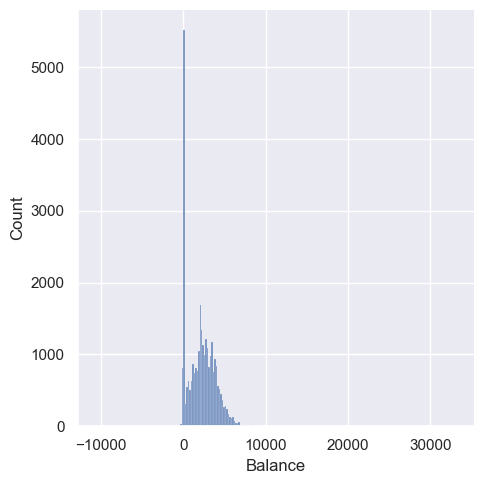

In [12]:
sns.displot(data_df.Balance)

In [13]:
data_df.Balance.describe()

count    29819.000000
mean      2164.607700
std       1688.290541
min     -10620.000000
25%        584.220000
50%       2149.170000
75%       3381.740000
max      33099.220000
Name: Balance, dtype: float64

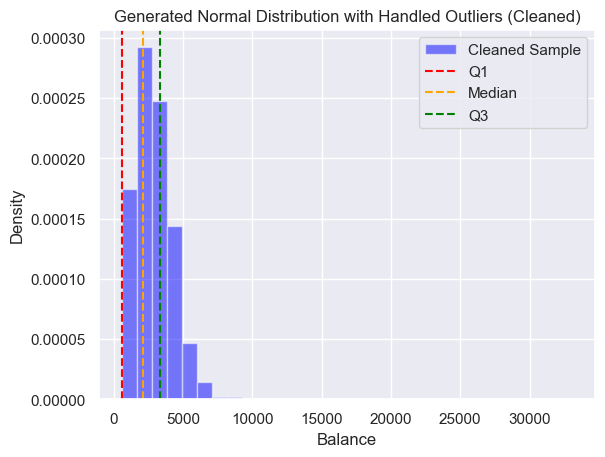

In [14]:
# Create a new DataFrame with outliers removed
cleaned_data_df = data_df[data_df['Balance'] >= 584.22]

# Plot histogram of the cleaned 'Balance' column
plt.hist(cleaned_data_df['Balance'], bins=30, density=True, alpha=0.5, color='blue', label='Cleaned Sample')

# Add vertical lines for the original quartile values
plt.axvline(x=584.22, color='red', linestyle='--', label='Q1')
plt.axvline(x=2149.17, color='orange', linestyle='--', label='Median')
plt.axvline(x=3381.74, color='green', linestyle='--', label='Q3')

plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Generated Normal Distribution with Handled Outliers (Cleaned)')
plt.legend()
plt.show()


In [15]:
cleaned_data_df.describe()

,CID,Limit,Age,Income,Balance
count,22364.000000,22364.000000,22364.000000,2145.000000,22364.000000
mean,162736.545654,2741.190082,41.864380,3625.600690,2868.923179
std,27300.072549,1069.760037,11.857038,2240.391691,1339.912195
min,100053.000000,500.000000,20.000000,500.000000,584.430000
25%,141977.000000,2000.000000,33.000000,2300.000000,1937.610000
50%,172509.000000,3000.000000,41.000000,3000.000000,2730.050000
75%,185422.500000,3500.000000,49.000000,4067.530000,3713.950000
max,194664.000000,6000.000000,84.000000,15000.000000,33099.220000


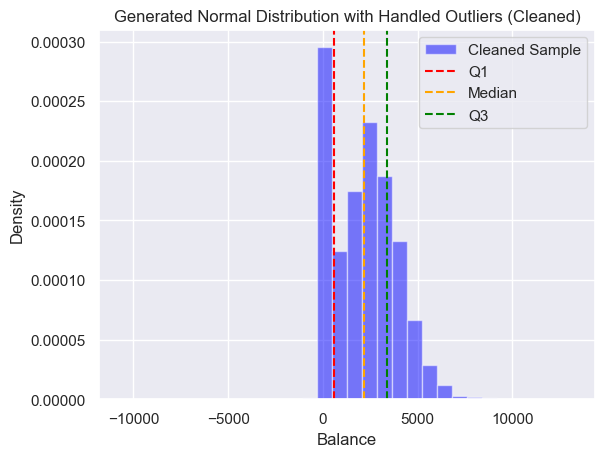

In [16]:
# Drop rows with the maximum value as an outlier
cleaned_data_df = data_df[data_df['Balance'] < 33099.22]

# Plot histogram of the cleaned 'Balance' column
plt.hist(cleaned_data_df['Balance'], bins=30, density=True, alpha=0.5, color='blue', label='Cleaned Sample')

# Add vertical lines for the original quartile values
plt.axvline(x=584.22, color='red', linestyle='--', label='Q1')
plt.axvline(x=2149.17, color='orange', linestyle='--', label='Median')
plt.axvline(x=3381.74, color='green', linestyle='--', label='Q3')

plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Generated Normal Distribution with Handled Outliers (Cleaned)')
plt.legend()
plt.show()
 

In [17]:
cleaned_data_df.describe() 

,CID,Limit,Age,Income,Balance
count,29818.000000,29818.000000,29818.000000,3169.000000,29818.000000
mean,158382.903448,2634.749849,42.124153,3515.600603,2163.570253
std,29132.610048,1147.784938,12.016786,2163.923792,1678.786870
min,100053.000000,1.000000,20.000000,273.240000,-10620.000000
25%,131779.250000,2000.000000,33.000000,2214.000000,584.115000
50%,168553.500000,2500.000000,41.000000,3000.000000,2149.170000
75%,184197.000000,3500.000000,50.000000,4000.000000,3381.740000
max,194664.000000,6000.000000,86.000000,15000.000000,13170.740000


The above codes are aimed at addressing the presence of zero balance values in the dataset. It is observed that a significant portion of the sample consists of zero balance cards. This raises two important questions:

1. Does an individual have a positive credit card balance?
2. If yes, what is the magnitude of the balance?

To answer these questions and to avoid the potential bias introduced by zero balance values, an additional data frame is created. This new data frame, called cleaned_data_df, only contains observations with a positive balance. By removing the zero balance cards, we can focus on analyzing the average balance of individuals who actively use their credit cards.

The histogram is then plotted based on the cleaned_data_df data frame, showing the distribution of positive credit card balances. Vertical lines are added to represent the original quartile values (Q1, Median, and Q3) for comparison and reference.

The resulting histogram provides a clearer understanding of the distribution of credit card balances among active users, without the influence of zero balance values. This allows for more accurate analysis and insights into the average balance across frequent credit card users.

Further analysis can be conducted using the cleaned_data_df data frame to explore patterns, trends, and relationships related to credit card balances among active users.

## Using LabelEncoder for preprocessing of "Gender" and "Аgе"

In [18]:
label_encoder = LabelEncoder()
cleaned_data_df['Gender_Encoded'] = label_encoder.fit_transform(cleaned_data_df['Gender'])
cleaned_data_df['Married_Encoded'] = label_encoder.fit_transform(cleaned_data_df['Married'])
print(cleaned_data_df[['Gender', 'Gender_Encoded', 'Married', 'Married_Encoded']])


      Gender  Gender_Encoded Married  Married_Encoded
0        Man               0     Yes                1
1        Man               0      No                0
2        Man               0      No                0
3        Man               0      No                0
4        Man               0     Yes                1
...      ...             ...     ...              ...
29814    Man               0      No                0
29815  Woman               1     Yes                1
29816    Man               0      No                0
29817  Woman               1     Yes                1
29818  Woman               1     Yes                1

[29818 rows x 4 columns]


C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_13364\4102243369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_df['Gender_Encoded'] = label_encoder.fit_transform(cleaned_data_df['Gender'])
C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_13364\4102243369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_df['Married_Encoded'] = label_encoder.fit_transform(cleaned_data_df['Married'])


In [19]:
# Select the relevant columns
selected_columns = ['Limit', 'Age', 'Income', 'Balance', 'Gender_Encoded', 'Married_Encoded']
selected_df = cleaned_data_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                    Limit       Age    Income   Balance  Gender_Encoded  \
Limit            1.000000  0.158909  0.205996  0.515080        0.024262   
Age              0.158909  1.000000 -0.018566  0.051857        0.106342   
Income           0.205996 -0.018566  1.000000  0.146774       -0.125665   
Balance          0.515080  0.051857  0.146774  1.000000        0.033323   
Gender_Encoded   0.024262  0.106342 -0.125665  0.033323        1.000000   
Married_Encoded  0.093217  0.234597  0.041079  0.045511        0.074151   

                 Married_Encoded  
Limit                   0.093217  
Age                     0.234597  
Income                  0.041079  
Balance                 0.045511  
Gender_Encoded          0.074151  
Married_Encoded         1.000000  


C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_13364\126340752.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_df.corr()


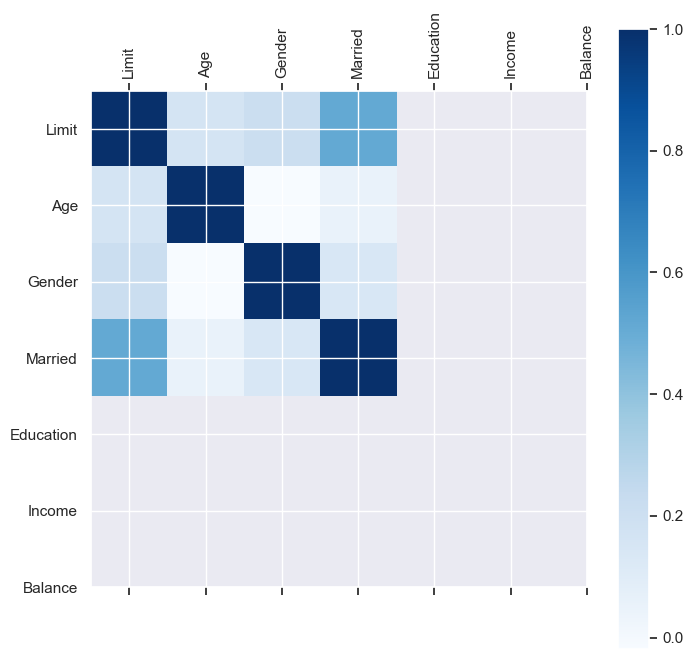

Limit      0.512366
Age        0.052477
Income     0.137301
Balance    1.000000
Name: Balance, dtype: float64


In [20]:

# Select the relevant columns
selected_columns = ['Limit', 'Age', 'Gender', 'Married', 'Education', 'Income', 'Balance']
selected_df = data_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()

tick_marks = range(len(selected_columns))
plt.xticks(tick_marks, selected_columns, rotation='vertical')
plt.yticks(tick_marks, selected_columns)

plt.show()

# Calculate correlations with 'Balance'
balance_correlations = correlation_matrix['Balance']
print(balance_correlations)





Based on the correlation matrix, Balance appears correlated with Limit, Income and Age, and moderately correlated with Income. In addition, Limit and Rating are highly correlated with each other, and they both have a relationship with Income.
1. Limit: The correlation coeficient between Limit and Balance is 0.512366. This indicates a moderate positive correlation. It suggest that as the credit limit increases, the balance in the account tends to increase as well. 
2. Income: The correlation coefficient between 'Income' and 'Balance' is 0.137301. This value suggests a weak positive correlation. It implies that as income increases, the account balance tends to increase, but the correlation is not very strong..
3. Age: The correlation coefficient between 'Age' and 'Balance' is 0.052477. This value is close to zero, indicating a weak or negligible correlation. It suggests that there is little or no linear relationship between a person's age and their account balance.

<Axes: xlabel='Limit', ylabel='Balance'>

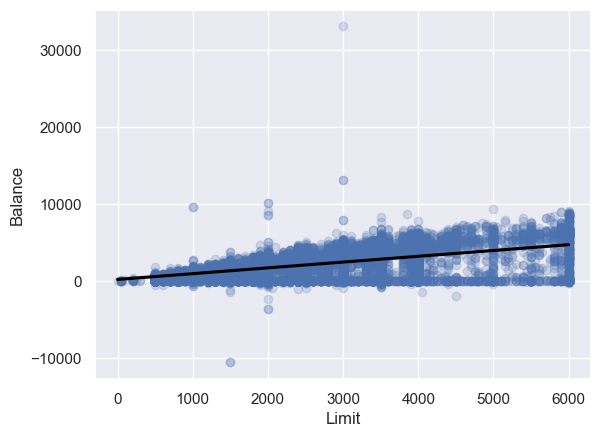

In [21]:
sns.regplot(x='Limit', y='Balance', data=selected_df, scatter_kws={'alpha': 0.2}, line_kws={'color': 'black'})


In [22]:
mod0 = smf.ols("Balance ~ Income + Age + Gender + Married", data = data_df).fit()
mod0.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.48
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.25e-13
Time:                        10:14:37   Log-Likelihood:                -28345.
No. Observations:                3169   AIC:                         5.670e+04
Df Residuals:                    3164   BIC:                         5.673e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1315.4909    140.752      9.346      0.000    1039.517    1591.465
Gender[T.Woman]    90.5393     67.878      1.334      0.182     -42.550     223.629
Married[T.Yes]    -30.1425     67.454     -0.447      0.655    -162.400     102.115
Income              0.1222      0.015      7.942      0.000       0.092       0.152
Age                 4.7313      2.759      1.715      0.086      -0.678      10.140
==============================================================================
Omnibus:                     1776.018   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81592.048
Skew:                           1.967   Prob(JB):                         0.00
Kurtosis:                      27.545   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Income appears to be positively associated with balance, contrary to our initial expectations. This suggests that as Income increases, the balance also increases. This could be interpreted in a way that higher income individuals may have more expenses or may be comfortable carrying more credit card debt.

Age has a positive but marginally significant relationship with balance (p=0.086), implying that as individuals grow older, their balance tends to slightly increase. This is somewhat counterintuitive as one might expect that with age and financial maturity, people would manage to keep their balances lower.

The variable Gender doesn't seem to play a significant role in determining the credit card balance (p=0.182). This suggests that the credit card balance doesn't considerably differ between men and women in this dataset.

Similarly, the Married status does not appear to have a significant impact on the balance (p=0.655). This indicates that marital status is not a significant determinant of the credit card balance in this sample.

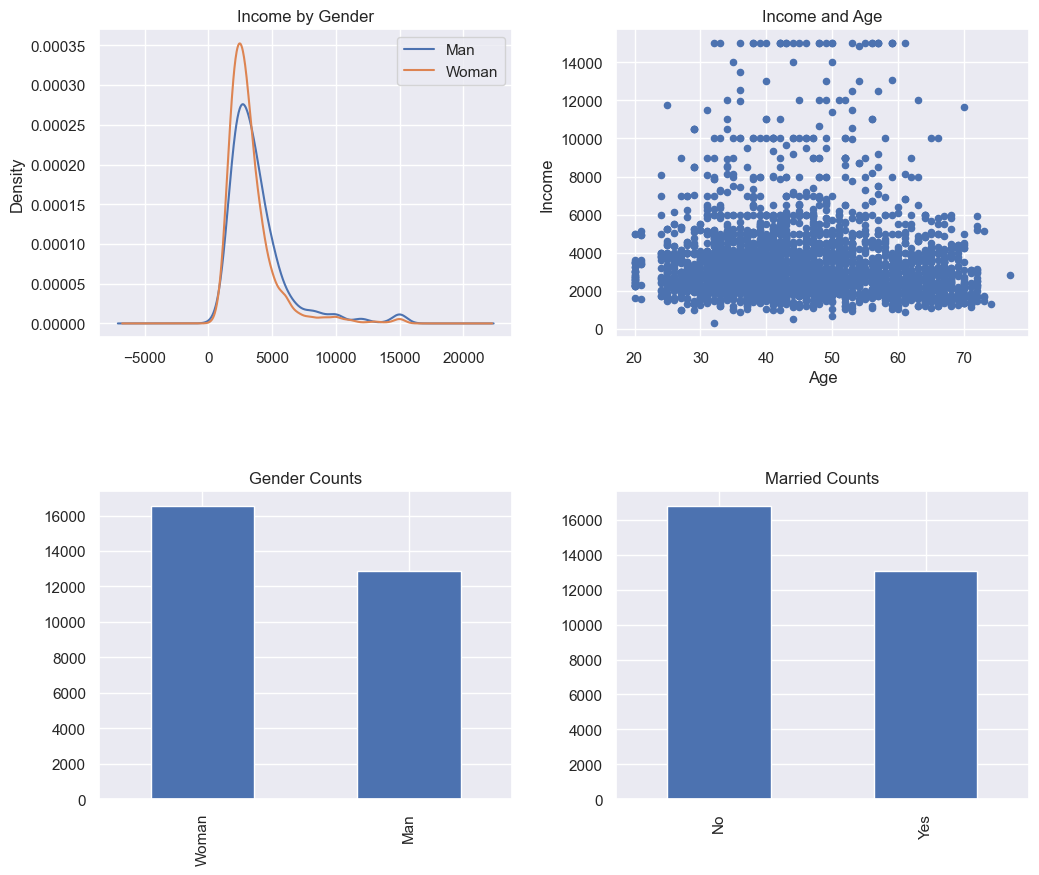

In [23]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=.5, wspace=.25)

# Plot KDE of Income by Gender
data_df.groupby('Gender').Income.plot(kind='kde', ax=axes[0][0], legend=True, title='Income by Gender')

# Plot scatter plot of Income and Age
data_df.plot(kind='scatter', x='Age', y='Income', ax=axes[0][1], title='Income and Age')

# Plot bar plot of Gender counts
data_df['Gender'].value_counts().plot(kind='bar', ax=axes[1][0], title='Gender Counts')

# Plot bar plot of Married counts
data_df['Married'].value_counts().plot(kind='bar', ax=axes[1][1], title='Married Counts')

# Show the plots
plt.show()


The KDE plot of Income by Gender helps us understand the distribution of income for different genders. It provides insights into any potential differences or similarities in income levels based on gender.

The scatter plot of Income and Age allows us to examine the relationship between these two variables. However, based on the plot, we don't observe any clear pattern or correlation between income and age.

The bar plot of Gender counts gives us a visual representation of the distribution of genders in the dataset. It provides insights into the gender composition of the population.

Similarly, the bar plot of Married counts displays the distribution of married and non-married individuals in the dataset.

Further analysis and exploration of the relationship between income, gender, and marital status may be necessary to uncover any potential insights or patterns within this dataset.

## Making predictions

Lastly the following code calculates predictions for new data based on the coefficients obtained from the mod0 OLS regression model. The df_new DataFrame contains the predictor variables (Income, Age, Gender, and Married) for which the Balance is predicted. The predictions are then added as a new column named Balance in the df_new DataFrame. Finally, the predicted balances are printed.

In [38]:
# We have new data in a DataFrame named df_new
df_new = pd.DataFrame({'Income': np.random.normal(45, 20, 40),
                       'Age': np.random.normal(56, 17, 40),
                       'Gender': ['Man', 'Woman'] * 20,
                       'Married': ['Yes', 'No'] * 20})

# Calculate predictions based on the coefficients
predictions = (mod0.params['Intercept'] +
               mod0.params['Income'] * df_new['Income'] +
               mod0.params['Age'] * df_new['Age'] +
               mod0.params['Gender[T.Woman]'] * (df_new['Gender'] == 'Woman').astype(int) +
               mod0.params['Married[T.Yes]'] * (df_new['Married'] == 'Yes').astype(int))

# Add the predictions to the new DataFrame
df_new['Balance'] = predictions

# View the predicted balances
print(df_new['Balance'])


0     1483.866373
1     1592.802818
2     1642.063347
3     1797.631406
4     1565.503515
5     1728.707928
6     1397.568523
7     1763.403004
8     1530.860857
9     1672.618340
10    1680.826012
11    1583.871534
12    1585.439539
13    1703.252456
14    1598.911555
15    1683.446908
16    1573.868443
17    1700.033921
18    1586.602771
19    1472.057840
20    1598.003170
21    1626.104363
22    1557.544201
23    1601.250796
24    1516.543117
25    1699.716336
26    1710.915300
27    1696.576947
28    1444.658628
29    1602.309776
30    1539.855872
31    1726.372341
32    1535.871279
33    1686.519566
34    1516.050686
35    1720.599000
36    1621.316219
37    1775.577997
38    1539.755079
39    1622.553723
Name: Balance, dtype: float64
